In [1]:
import matplotlib.pyplot as plt
from glob import glob
import cv2
import random
import os
%matplotlib inline

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
import tensorflow as tf

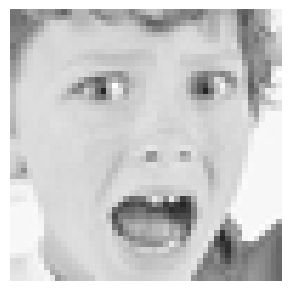

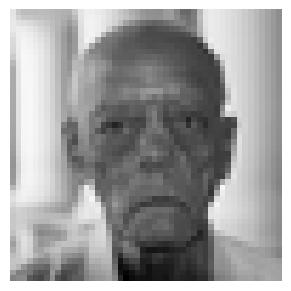

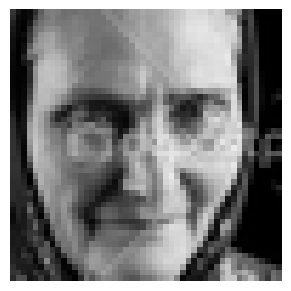

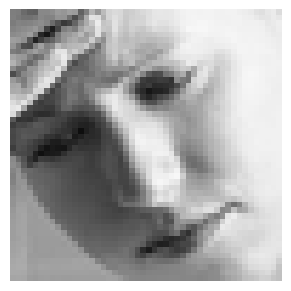

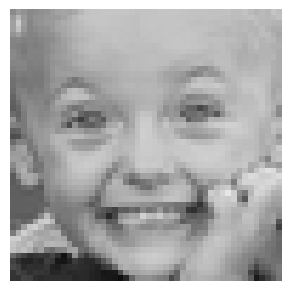

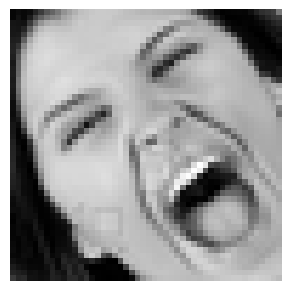

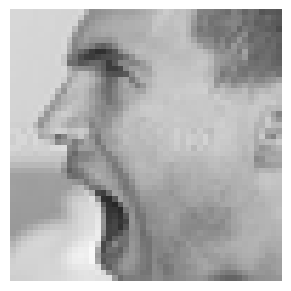

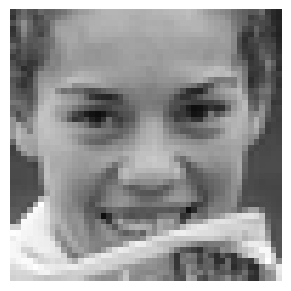

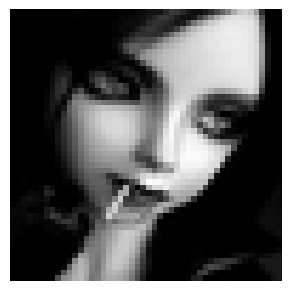

In [3]:
# Exploring Dataset
images = glob("C:/Users/absub/Downloads/emotion/train/*/*")
for i in range(9):
    image = random.choice(images)
    plt.figure(figsize=(12,12))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(image))
    plt.axis('off')

In [4]:
# Preparing Data for Training
img_size = 48
batch_size = 64
datagen_train = ImageDataGenerator()
train_generator = datagen_train.flow_from_directory("C:/Users/absub/Downloads/emotion/train/",
                                                   target_size=(img_size, img_size),
                                                   color_mode="grayscale",
                                                   batch_size=batch_size,
                                                   class_mode="categorical",
                                                   shuffle=True)

Found 28709 images belonging to 7 classes.


In [5]:
datagen_validation = ImageDataGenerator()

In [6]:
validation_generator = datagen_train.flow_from_directory("C:/Users/absub/Downloads/emotion/test/",
                                                   target_size=(img_size, img_size),
                                                   color_mode="grayscale",
                                                   batch_size=batch_size,
                                                   class_mode="categorical",
                                                   shuffle=True)

Found 7178 images belonging to 7 classes.


In [7]:
# Defining Model
def Convolution(input_tensor, filters, kernel_size):
    x = Conv2D(filters=filters, kernel_size=kernel_size, padding="same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.25)(x)
    return x

In [8]:
def Dense_f(input_tensor, nodes):
    x = Dense(nodes)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)
    return x

In [9]:
def model_emotion_detection(input_shape):
    inputs = Input(input_shape)
    conv_1 = Convolution(inputs, 32, (3, 3))
    conv_2 = Convolution(conv_1, 64, (7, 7))
    conv_3 = Convolution(conv_2, 128, (3, 3))

    flatten = Flatten()(conv_3)
    
    dense_1 = Dense_f(flatten, 256)
    
    output = Dense(7, activation="softmax")(dense_1)
    model = Model(inputs=[inputs], outputs=[output])
    
    model.compile(loss=['categorical_crossentropy'], optimizer='adam', metrics=["accuracy"])
    
    return model

In [10]:
model = model_emotion_detection((48, 48, 1))

In [11]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 48, 48, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 48, 48, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 48, 48, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 64)          │         100,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 24, 24, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,358,215 (5.18 MB)

 Trainable params: 1,357,255 (5.18 MB)

 Non-trainable params: 960 (3.75 KB)

In [12]:
# Initializing the Model
epochs = 15
steps_per_epoch = train_generator.n // train_generator.batch_size
validation_steps = validation_generator.n // validation_generator.batch_size

# checkpoint = ModelCheckpoint("model_emotion_detection.h5", monitor='val_accuracy', save_weights_only=True, mode='max', verbose=1)
# callbacks = [checkpoint]

# Training the Model
history = model.fit(
    x=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    #callbacks=callbacks
)

Epoch 1/15


C:\Users\absub\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


448/448 ━━━━━━━━━━━━━━━━━━━━ 3581s 8s/step - accuracy: 0.3127 - loss: 1.8106 - val_accuracy: 0.2797 - val_loss: 1.8642
Epoch 2/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 4:26 596ms/step - accuracy: 0.5156 - loss: 1.4160

C:\Users\absub\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


448/448 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.5156 - loss: 1.4160 - val_accuracy: 0.4000 - val_loss: 1.9805
Epoch 3/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 2572s 6s/step - accuracy: 0.4545 - loss: 1.4126 - val_accuracy: 0.4597 - val_loss: 1.3976
Epoch 4/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5625 - loss: 1.2638 - val_accuracy: 0.5000 - val_loss: 1.4969
Epoch 5/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 2957s 7s/step - accuracy: 0.5168 - loss: 1.2774 - val_accuracy: 0.4581 - val_loss: 1.3852
Epoch 6/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - accuracy: 0.5000 - loss: 1.2466 - val_accuracy: 0.2000 - val_loss: 1.7344
Epoch 7/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 3368s 7s/step - accuracy: 0.5475 - loss: 1.1946 - val_accuracy: 0.5407 - val_loss: 1.2101
Epoch 8/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 25s 54ms/step - accuracy: 0.5156 - loss: 1.2129 - val_accuracy: 0.6000 - val_loss: 0.9191
Epoch 9/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 3082s 7s/step - accuracy: 0.5695 - loss: 1.1448 - val_accuracy: 

In [13]:
# Model Evaluation
model.evaluate(validation_generator)

113/113 ━━━━━━━━━━━━━━━━━━━━ 100s 874ms/step - accuracy: 0.5889 - loss: 1.0996


[1.0836974382400513, 0.5968236327171326]

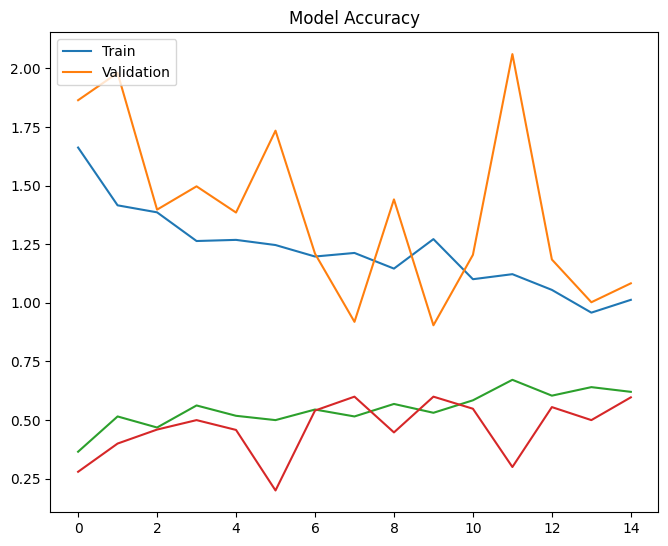

In [14]:
# Plotting Loss and Accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.0, bottom=0.0, right=0.95, left=0.0, hspace=0.25, wspace=0.35)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.0, bottom=0.0, right=0.95, left=0.0, hspace=0.25, wspace=0.35)

In [15]:
# Saving Model
model.save("emotion_detection_model.h5")